In [1]:

import matplotlib.pyplot as plt
import seaborn as sb
import biosppy as bp

import numpy as np
import pandas as pd
import os
import pickle
from scipy import interpolate

from scipy import signal
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pylab as pl
from IPython import display
import numpy as np
from importlib import reload  # Python 3.4+ only.
reload(bp)
import wfdb
folder = "C:\\Users\\Mariana\\AppData\\Local\\VirtualStore\\Program Files (x86)\\GnuWin32\\bin\\www.physionet.org\\physiobank\\database\\apnea-ecg"
import os
all_files = os.listdir(folder)
import string                                                                                      
users_resp = sorted(set([file[:5] for file in all_files if file[1] in string.digits and file[3]=='e'] ))
print(users_resp)
bitalino = "C:\\Users\\Mariana\\Documents\\Databases\\APNEIA\\"
# all_files = [folder+ol for ol in os.listdir(folder)]
bitalino_files = [bitalino + ol for ol in os.listdir(bitalino)]

Using TensorFlow backend.


['a01er', 'a02er', 'a03er', 'a04er', 'b01er', 'c01er', 'c02er', 'c03er']


[766.701, 836.8, 859.2, 929.2, 948.6, 1018.6, 1047.3, 1117.3]


<Figure size 432x288 with 0 Axes>

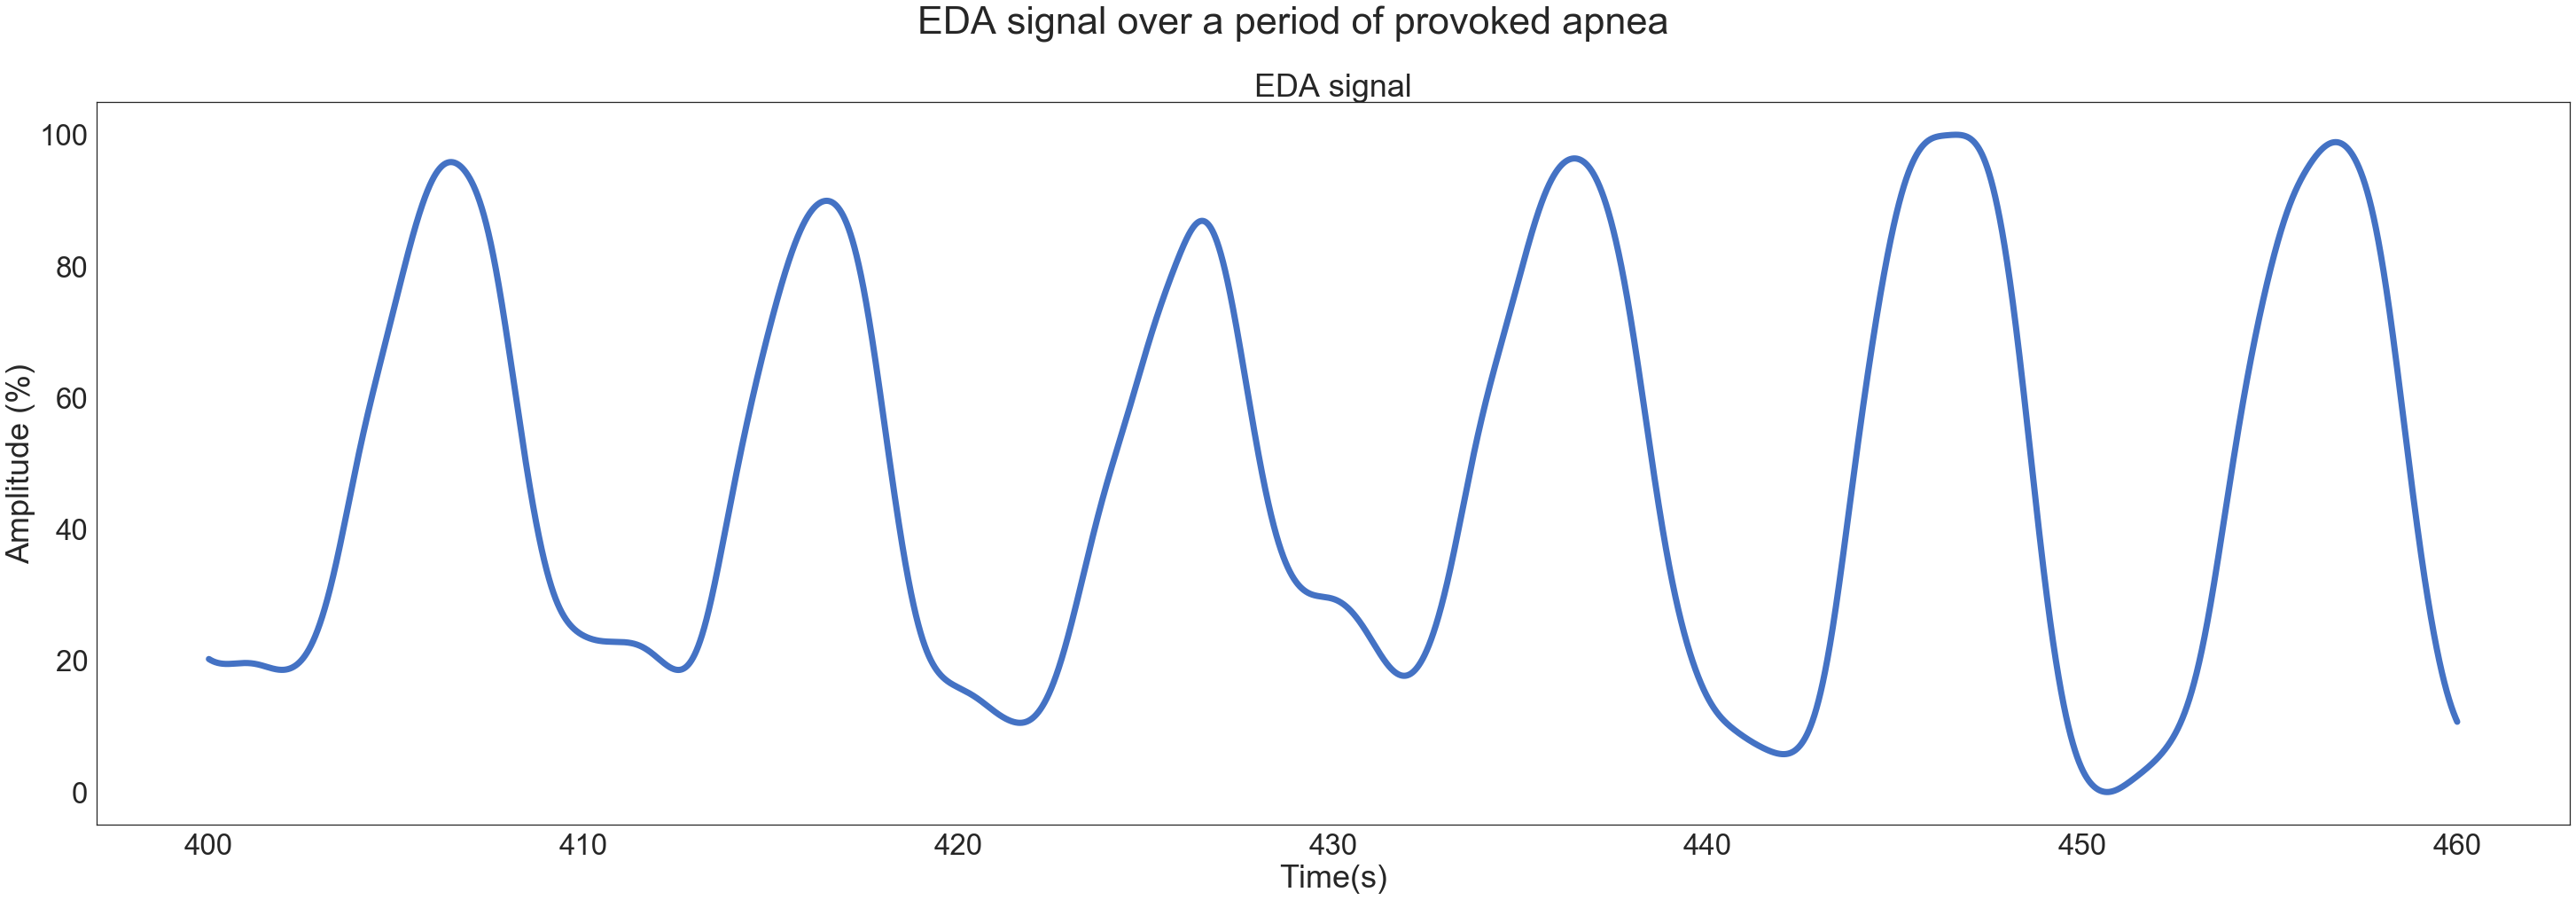

In [26]:
from scipy import signal
def normal(sg, minsg = 0, maxsg = 0):
    if minsg == 0:
        minsg = np.min(sg)
        maxsg = np.max(sg)
    res = 100 * (sg - minsg) / (maxsg - minsg)
    return res

def find_extremes(sig, mode, th):
    indexes, values = bp.tools.find_extrema(sig, mode)
    ind, peaks = [], []
    for pk in range(len(values)):
        if abs(values[pk] - np.mean(sig)) > float(th):
            ind += [indexes[pk]]
            peaks += [values[pk]]
    return ind, peaks


def deep_breath(sig):
    #the signal of the first apnea is received. The deep breath is characterized by a
    #sudden increase, which corresponds to a high value of the positive derivative.
    #to find the deep breathe we use find extremes
    ind, peaks = find_extremes(sig, 'both', 0.3)
    if peaks == []:
        plt.plot(sig)
        plt.scatter(ind,peaks)
        plt.show()
    div1 = np.diff(peaks)
    deep_b = np.max(div1)
    if deep_b > 0:
        print('\ndeep breathe was found')
        deep_idx = int(np.where(div1 == deep_b)[0])
        res = [peaks[deep_idx], peaks[deep_idx+1]]
    else:
        print(peaks, div1)
        res = 0
    print(res)
    return res

import seaborn as sb
sb.set(font_scale=3)

marker_label = dict([(2, 'N'), (5, 'N'), (8, 'A'), (10, 'A'), (12, 'A'), (14, 'A'), (16, 'A')])

for bf in [38]:#range(len(bitalino_files)):
    labs = []
    data = []
    df = pd.DataFrame.from_csv(bitalino_files[bf], parse_dates=True, index_col=0, header=0,sep=';')
    #eda = np.array(bp.tools.filter_signal(df.A3, ftype='butter', band='bandpass', order=2, frequency=[0.01,2],sampling_rate=1000.)[
     #                   'signal'])
    resp = np.array(bp.tools.filter_signal(df.A1, ftype='butter', band='bandpass', order=2, frequency=[0.01,0.35],sampling_rate=1000.)[
                        'signal'])
    
    list_markers = [mk/1000 for mk, marker in enumerate(df.MARKER) if
                        marker != 0 and marker in marker_label.keys()]
    print(list_markers[6:])

    #eda = normal(eda)
    resp = normal(resp[400000:460000])
    sb.set_style("white")
    sb.despine()
    fig=plt.figure(figsize=(50,15))
    fig.suptitle('EDA signal over a period of provoked apnea')
    #plt.subplot(1,2,1)

    #plt.plot(np.arange(1000,len(bvp)/1000,0.001),bvp[1000000:], color ='#339933',linewidth=3)
    plt.plot(np.arange(400,460,0.001),resp, color ='#4472c4',linewidth=7)
    #plt.vlines(list_markers[6:],5,100, linewidth=2)

    plt.title('EDA signal')
    plt.xlabel('Time(s)')
    
    plt.ylabel('Amplitude (%)')
  #  plt.subplot(1,2,2)
    
#     plt.plot(np.arange(700,1100,0.001),resp[700000:1100000], color ='#4472c4',linewidth=7)
#     plt.vlines(list_markers[6:],5,100)
#     plt.ylim(5,101)
#     plt.title('Respiration signal')
#     plt.xlabel('Time(s)')
#     plt.ylabel('Amplitude (%)')
    lab = ['A','R','A','R','A','R','A']
#     for lm, marker in enumerate(list_markers[6:-1]):
#         print((list_markers[lm+7]-marker)/2)
#         xax = marker+(list_markers[lm+7]-marker)/2-5
#         print(xax)
#         plt.text(xax,90,lab[lm])

    plt.savefig('respAP', bbox_inches='tight', format='eps')
    plt.show()
      
            

        



In [52]:
from scipy import signal
def normal(sg, minsg = 0, maxsg = 0):
    if minsg == 0:
        minsg = np.min(sg)
        maxsg = np.max(sg)
    res = 100 * (sg - minsg) / (maxsg - minsg)
    return res

def find_extremes(sig, mode, th):
    indexes, values = bp.tools.find_extrema(sig, mode)
    ind, peaks = [], []
    for pk in range(len(values)):
        if abs(values[pk] - np.mean(sig)) > float(th):
            ind += [indexes[pk]]
            peaks += [values[pk]]
    return ind, peaks


def deep_breath(sig):
    #the signal of the first apnea is received. The deep breath is characterized by a
    #sudden increase, which corresponds to a high value of the positive derivative.
    #to find the deep breathe we use find extremes
    ind, peaks = find_extremes(sig, 'both', 0.3)
    if peaks == []:
        plt.plot(sig)
        plt.scatter(ind,peaks)
        plt.show()
    div1 = np.diff(peaks)
    deep_b = np.max(div1)
    if deep_b > 0:
        print('\ndeep breathe was found')
        deep_idx = int(np.where(div1 == deep_b)[0])
        res = [peaks[deep_idx], peaks[deep_idx+1]]
    else:
        print(peaks, div1)
        res = 0
    print(res)
    return res

import seaborn as sb
sb.set(font_scale=3)

marker_label = dict([(2, 'N'), (5, 'N'), (8, 'A'), (10, 'A'), (12, 'A'), (14, 'A'), (16, 'A')])


resps = []
for bf in [10, 26, 38]:#range(len(bitalino_files)):
    labs = []
    data = []
    df = pd.DataFrame.from_csv(bitalino_files[bf], parse_dates=True, index_col=0, header=0,sep=';')
    #eda = np.array(bp.tools.filter_signal(df.A3, ftype='butter', band='bandpass', order=2, frequency=[0.01,2],sampling_rate=1000.)[
     #                   'signal'])
    resp = np.array(bp.tools.filter_signal(df.A1, ftype='butter', band='bandpass', order=2, frequency=[0.01,0.35],sampling_rate=1000.)[
                        'signal'])
    
    list_markers = [mk/1000 for mk, marker in enumerate(df.MARKER) if
                        marker != 0 and marker in marker_label.keys()]
    print(list_markers[6:])

    #eda = normal(eda)
    from scipy import signal
    
    resps += [signal.resample(normal(resp[400000:460000]),1000)]
#     sb.set_style("white")
#     sb.despine()
#     fig=plt.figure(figsize=(50,15))
#     #plt.subplot(1,2,1)
    

#     plt.plot(np.arange(400,440,0.001),resp, color ='#4472c4',linewidth=15)

#     plt.axis('off')
    
#     plt.grid(b=None)
#     plt.savefig('respAP', bbox_inches='tight', format='png')
#     plt.show()

[787.2, 857.263, 863.101, 933.2, 938.3, 1008.3, 1020.8, 1090.8]
[786.6, 856.6, 884.1, 954.1, 985.4, 1055.4, 1095.4, 1165.469]
[766.701, 836.8, 859.2, 929.2, 948.6, 1018.6, 1047.3, 1117.3]


In [53]:
encoder = pickle.load(open('RN_encoder', 'rb'))
decoder = pickle.load(open('RN_decoder', 'rb'))

enc = encoder.predict(resps)
dec = decoder.predict(enc)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 3 arrays: [array([[2.20724570e+01],
       [2.20730460e+01],
       [2.24292122e+01],
       [2.27016233e+01],
       [2.30422643e+01],
       [2.33489663e+01],
       [2.36954921e+01],
       [2.40206408e+01],...